In [1]:
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# 读取数据文件
df = pd.read_csv('./boston.csv', header=0)
df = df.values
df = np.array(df) 

# 归一化预处理
for i in range(12):
    df[:,i] = (df[:,i] - df[:].min())/(df[:].max() - df[:].min())

x_data = df[:,:12]
y_data = df[:,12]

x = tf.placeholder(tf.float32, [None, 12], name = 'X')
y = tf.placeholder(tf.float32, [None, 1], name = "Y")

In [2]:
# 超参数设置
train_epochs = 200
learing_rate = 0.03
# 模型设置
with tf.name_scope("model"):
    w = tf.Variable(tf.random_normal([12, 1], stddev=0.01), name='W')
    b = tf.Variable(1.0, name='b')
    
    def model(x,w,b):
        return tf.matmul(x,w)+b
    
    pred = model(x,w,b)
    
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2)) # 均方误差
    optimizer = tf.train.GradientDescentOptimizer(learing_rate).minimize(loss_function)


<IPython.core.display.Javascript object>


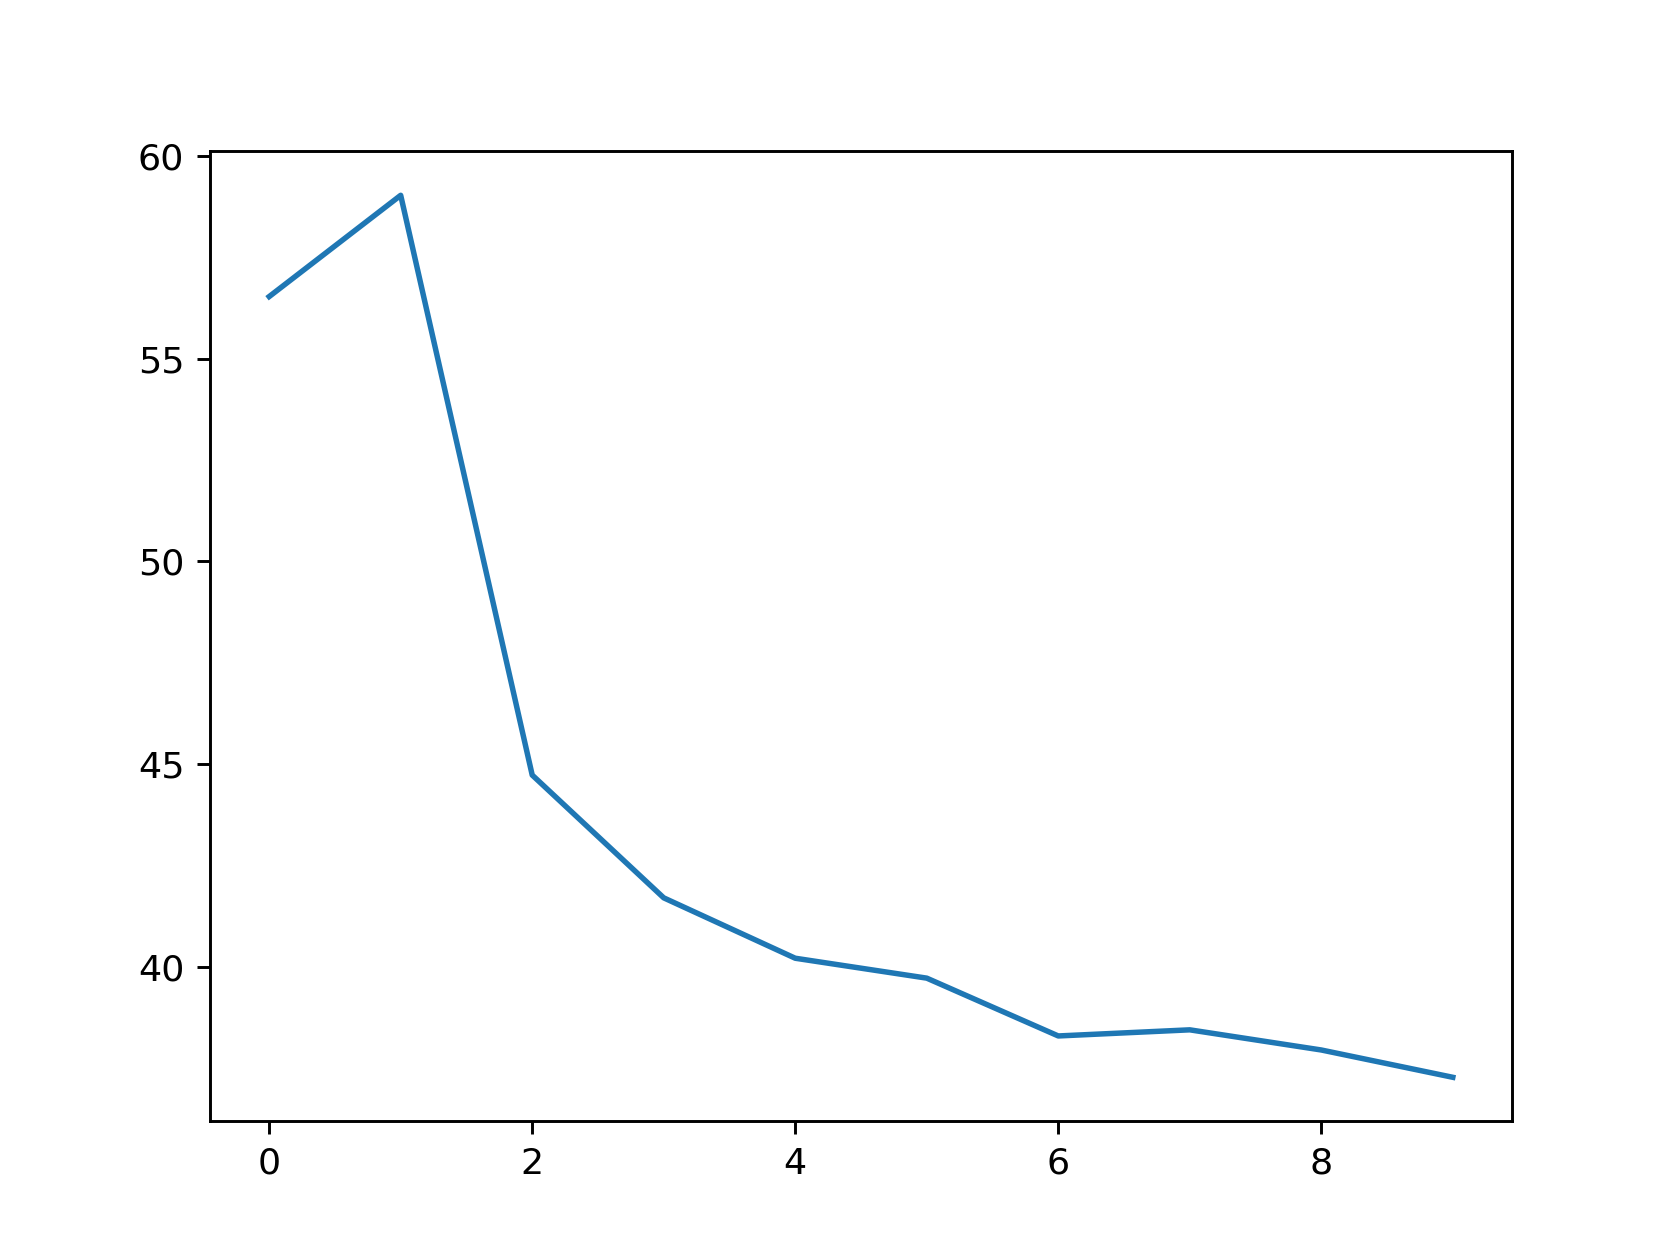

train_epochs =  200  learing_rate =  0.03 epoch= 10  loss= 37.2795348894  b= 39.7976
w= [ -1.84054947   7.28259945  -0.87626845   0.1123253    0.05168275
   1.23027563   5.74363279  -0.57226783   0.73747104  -2.67321348
 -12.0400095  -41.94973373]


In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_list = []

tf.reset_default_graph()
logdir='C:/code/log'
writer = tf.summary.FileWriter(logdir, sess.graph)
sum_loss_op = tf.summary.scalar("loss", loss_function)
merged = tf.summary.merge_all()

for epoch in range(10):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        
        _,summary_str, loss = sess.run([optimizer,sum_loss_op, loss_function], feed_dict={
            x:xs, y:ys
        })
        
        writer.add_summary(summary_str, epoch)
        
        loss_sum = loss_sum + loss
        
    # 打乱样本集
    x_data, y_data = shuffle(x_data, y_data)

    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    loss_average = loss_sum/len(y_data)
        
    #print("epoch=", epoch+1, " loss=",loss_average, " b=", b0temp, " w=", w0temp)
    loss_list.append(loss_average)
plt.plot(loss_list)
print("train_epochs = ", train_epochs ," learing_rate = ",learing_rate,"epoch=", epoch+1, " loss=",loss_average, " b=", b0temp)
print("w=", w0temp.reshape(12))

In [4]:
writer.close()
sess.close()